<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(576, 8)
(576,)
(192, 8)
(192,)
[[114  14]
 [ 34  30]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       128
           1       0.68      0.47      0.56        64

    accuracy         

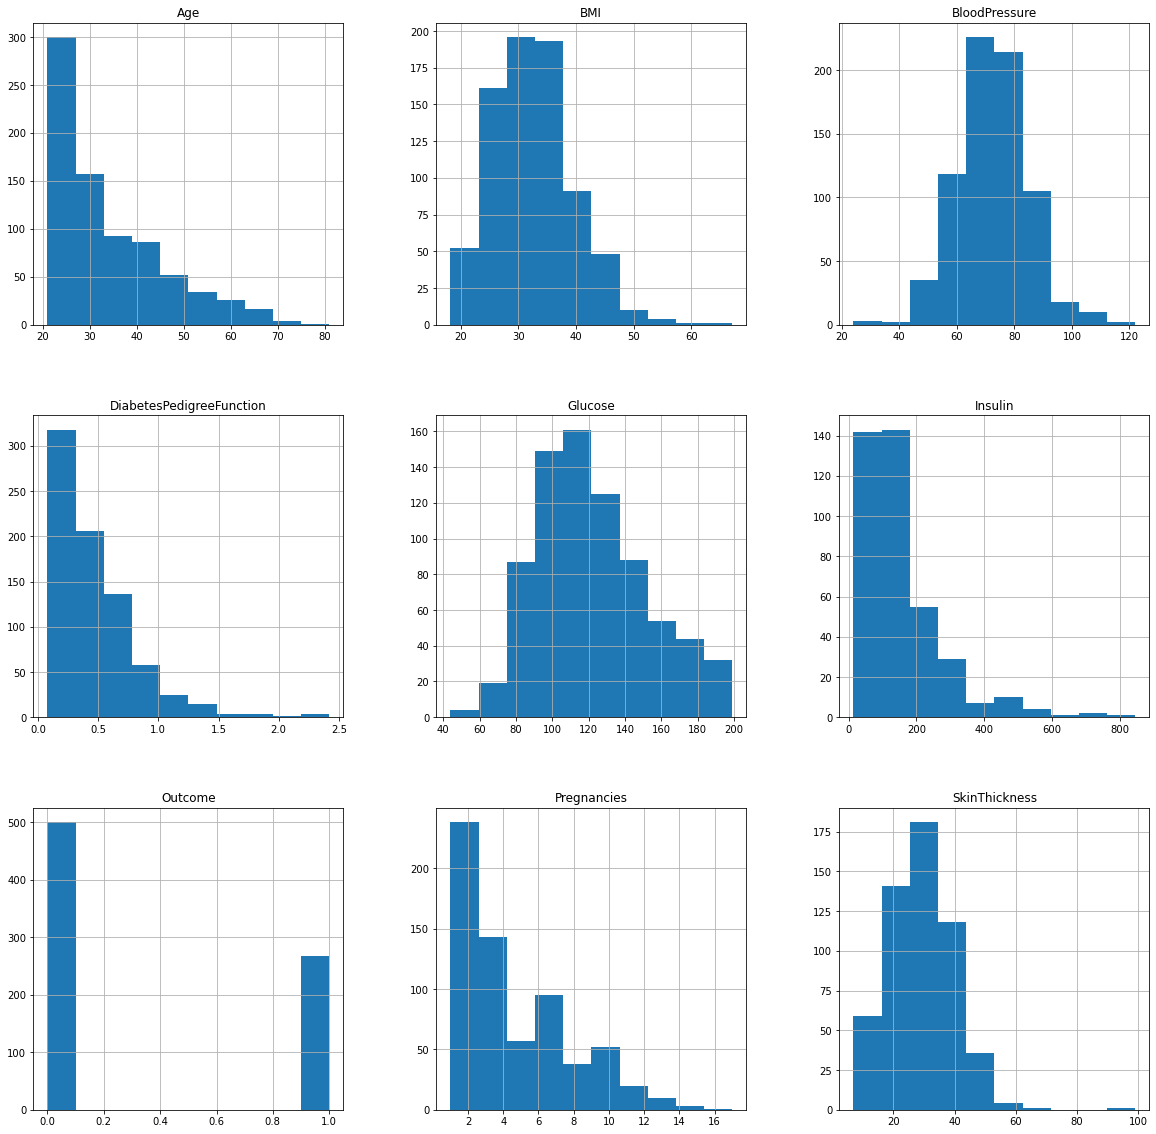

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



df = pd.read_csv(r"C:\Users\saran\Documents\INEURON\MACHINE_LEARNING\Logistic-regression_final (2)\Logistic-regression_final\diabetes.csv")

dtypes = df.dtypes
info = df.info()

missing_data = df.isnull().sum()

df["Pregnancies"] = df["Pregnancies"].replace(0,np.NaN)
df["Glucose"] = df["Glucose"].replace(0,np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["Insulin"] = df["Insulin"].replace(0,np.nan)
df["BMI"] = df["BMI"].replace(0,np.nan)

missing_data = df.isnull().sum()

# now check the distribution of data so that we can impute the missing values based on distribution of data set

distribution = df.hist(figsize=(20,20))


#imputing missing values
df["Pregnancies"] = df["Pregnancies"].fillna(df["Pregnancies"].median())
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

#now checking the null values again

missing_data = df.isnull().sum()

# now we are good to go ahead

# in the given dataset the all the features in different scale so we need to do feature scalling

x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]


scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)

xtrain , xtest , ytrain, ytest = train_test_split(xscaled,y,random_state =22)

#checking the shape
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

def classifier_decision(model):
    model.fit(xtrain,ytrain)
    ytest_pred = model.predict(xtest)
    decision = model.decision_function(xtest)
    con_mat = confusion_matrix(ytest,ytest_pred)
    report = classification_report(ytest,ytest_pred)
    AUC = roc_auc_score(ytest,decision)
    accuracy = accuracy_score(ytest,ytest_pred)
    print(con_mat)
    print(report)
    print("auc",AUC)
    print("accuracy",accuracy)


def classifier_proba(model):
    model.fit(xtrain,ytrain)
    ytest_pred = model.predict(xtest)
    proba = model.predict_proba(xtest)[:,1]
    con_mat = confusion_matrix(ytest,ytest_pred)
    report = classification_report(ytest,ytest_pred)
    AUC = roc_auc_score(ytest,proba)
    accuracy = accuracy_score(ytest,ytest_pred)
    print(con_mat)
    print(report)
    print("auc",AUC)
    print("accuracy",accuracy)



classifier_proba(LogisticRegression())

classifier_proba(RandomForestClassifier())

classifier_proba(XGBClassifier())

classifier_proba(AdaBoostClassifier())

classifier_proba(GradientBoostingClassifier())

classifier_proba(DecisionTreeClassifier())

classifier_proba(KNeighborsClassifier())

classifier_decision(SVC())

classifier_proba(GaussianNB())



In [38]:
logit_param = {
    
    "C" : [2,3,3.5,4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3,5.4,5.4,6,7,8,9],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter":[100,200,300,400,500,600,1000,2000]
    
    }

logit_grid = GridSearchCV(LogisticRegression(),param_grid=logit_param,scoring="recall",n_jobs=-1,verbose=3)


logit_grid.fit(xtrain,ytrain)


auc = logit_grid.predict_proba(xtest)[:,1]

roc_auc_score(ytest,auc)

Fitting 5 folds for each of 760 candidates, totalling 3800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 3800 out of 3800 | elapsed:   14.1s finished


0.8133544921875

In [ ]:
forest_param = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [5,10,15,20,25,30],
    'min_samples_split' : [2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5,6],
    
    'max_features' : ["auto", "sqrt", "log2"],
    'max_samples' : [10,20,30,40,50,60,70,80]

}

forest_grid = GridSearchCV(RandomForestClassifier(),param_grid=forest_param,n_jobs=-1,verbose=3)
forest_grid.fit(xtrain,ytrain)

prob = forest_grid.predict_proba(xtest)[:,1]

roc = roc_auc_score(ytest,prob)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e